# Customer Personality Analysis

#### Description

The dataset was obtained from the Kaggle competition <a href= https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis>"Customer Personality Analysis"</a>. The dataset is under the public domain license. 

#### Purpose

This dataset is a good real life example how unsupervised learning can help with customer segmentation based on marketing data.
To assess possible marketing opportunities it is crucial to have a model that can predict customer behavior and demand.


#### Contact
[![LinkedIn](https://img.shields.io/badge/linkedin-%230077B5.svg?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/m-nemeth/)
[![GitHub](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white)](https://github.com/marci-nemeth)
[![Kaggle](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/marcellnmeth)


#### Packages used:
![Keras](https://img.shields.io/badge/Keras-%23D00000.svg?style=for-the-badge&logo=Keras&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-%23ffffff.svg?style=for-the-badge&logo=Matplotlib&logoColor=black)
![NumPy](https://img.shields.io/badge/numpy-%23013243.svg?style=for-the-badge&logo=numpy&logoColor=white)
![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)
![scikit-learn](https://img.shields.io/badge/scikit--learn-%23F7931E.svg?style=for-the-badge&logo=scikit-learn&logoColor=white)
![TensorFlow](https://img.shields.io/badge/TensorFlow-%23FF6F00.svg?style=for-the-badge&logo=TensorFlow&logoColor=white)

#### To-Do

---
## Table of contents
1. [Dataset](#1-dataset)
2. [Exploratory Data Analysis](#2-exploratory-data-analysis)
3. [Refining the data](#3-refining-data--feature-engineering)
4. [PCA](#4-principal-component-analysis)
5. [Clustering](#5-clustering)
6. [Analysis](#6-analysis)

    6.1 [Income vs Spending](#61-income-vs-spending)

    6.2 [Promotions Used](#62-promotions-used)

    6.3 [Base Characteristics](#63-base-characteristics)


7. [Conclusion](#7-conclusion)
8. [Sources](#8-sources)

## 1. Dataset



### Features (by the 4-P's)

Attributes

People

 - ID: Customer's unique identifier
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Recency: Number of days since customer's last purchase
 - Complain: 1 if the customer complained in the last 2 years, 0 otherwise


Products

 - MntWines: Amount spent on wine in last 2 years
 - MntFruits: Amount spent on fruits in last 2 years
 - MntMeatProducts: Amount spent on meat in last 2 years
 - MntFishProducts: Amount spent on fish in last 2 years
 - MntSweetProducts: Amount spent on sweets in last 2 years
 - MntGoldProds: Amount spent on gold in last 2 years


Promotion

 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


Place
 - NumWebPurchases: Number of purchases made through the company’s website
 - NumCatalogPurchases: Number of purchases made using a catalogue
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to company’s website in the last month


Target
Need to perform clustering to summarize customer segments.

Acknowledgement
The dataset for this project is provided by Dr. Omar Romero - Hernandez.
Some parts of this notebook were inspired by <a href=https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/code>other notebooks on Kaggle</a>

---

## 2. Exploratory Data Analysis

In this section we load the data and the required libraries, divide features to categorical, ordinal and continuous.
We display the distribution of categorical variables and see which features contain Nan values.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
import sys


In [2]:
os.environ["OMP_NUM_THREADS"] = '9' # To prevent memory-leakage in Windows
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("data//marketing_campaign.csv",index_col=0,delimiter="\t")

In [5]:
print(df.describe().T)

                      count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   

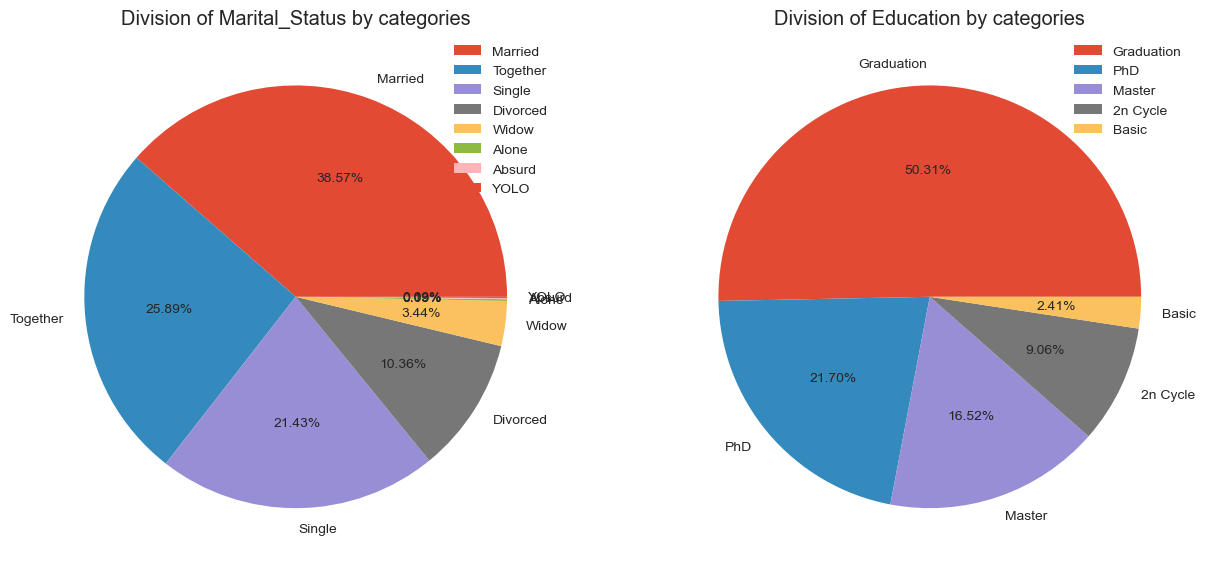

In [6]:
%matplotlib inline

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))

wedges, texts, autotexts  =ax1.pie(df["Marital_Status"].value_counts().values,labels=df["Marital_Status"].value_counts().index.tolist(),autopct='%.2f%%')
wedges, texts, autotexts  =ax2.pie(df["Education"].value_counts().values,labels=df["Education"].value_counts().index.tolist(),autopct='%.2f%%')
ax1.legend(loc=1)
ax2.legend(loc=1)
ax1.set_title("Division of Marital_Status by categories")
ax2.set_title("Division of Education by categories")

plt.show()

In [7]:
quantitative = [c for c in df.columns if df.dtypes[c] != 'object']
qualitative = [c for c in df.columns if df.dtypes[c] == 'object']


In [8]:
missing_values = pd.isnull(df).sum().sort_values(ascending=True)
print(missing_values[missing_values>0])

Income    24
dtype: int64


---

## 3. Refining data + Feature Engineering

Remove Nan Values

In [9]:
filtered_df = df.copy()
filtered_df = filtered_df.dropna(axis=0)
print("{:.0f} data-points dropped because of Nan values".format(len(df)-len(filtered_df)))

24 data-points dropped because of Nan values


### Removing outliers

Based on the 2 variables, income and year of birth, we filter the dataset such that Z-scores >2 are removed.

In [10]:

before = len(filtered_df)
for c in ["Income","Year_Birth"]:
    filtered_df = filtered_df[np.abs(filtered_df[c]-df[c].mean()) <= (2*filtered_df[c].std())]
print("{:.0f} data-points dropped because of Z-scores greater than 2".format(before-len(filtered_df)))

45 data-points dropped because of Z-scores greater than 2


In [11]:

filtered_df["Dt_Customer"] = pd.to_datetime(filtered_df["Dt_Customer"], format="%d-%m-%Y")

    


basedate = max(filtered_df["Dt_Customer"])
baseyear = 2014

filtered_df["days_since_customer"] = filtered_df["Dt_Customer"].apply(lambda x: (basedate-x).days)
filtered_df["age_years"] = filtered_df["Year_Birth"].apply(lambda x: (baseyear-x))


In [12]:
filtered_df.drop(["Dt_Customer","Year_Birth"],axis=1,inplace=True)

## 

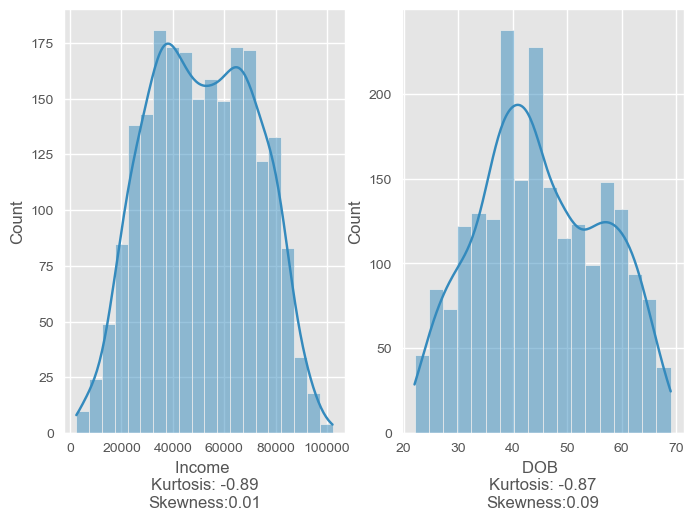

In [13]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.histplot(filtered_df["Income"],kde=True,ax=ax1)
sns.histplot(filtered_df["age_years"],kde=True,ax=ax2)
ax1.set_xlabel("Income \nKurtosis: {:.2f}\nSkewness:{:.2f}".format(filtered_df["Income"].kurt(),filtered_df["Income"].skew()))
ax2.set_xlabel("DOB \nKurtosis: {:.2f}\nSkewness:{:.2f}".format(filtered_df["age_years"].kurt(),filtered_df["age_years"].skew()))
plt.show()

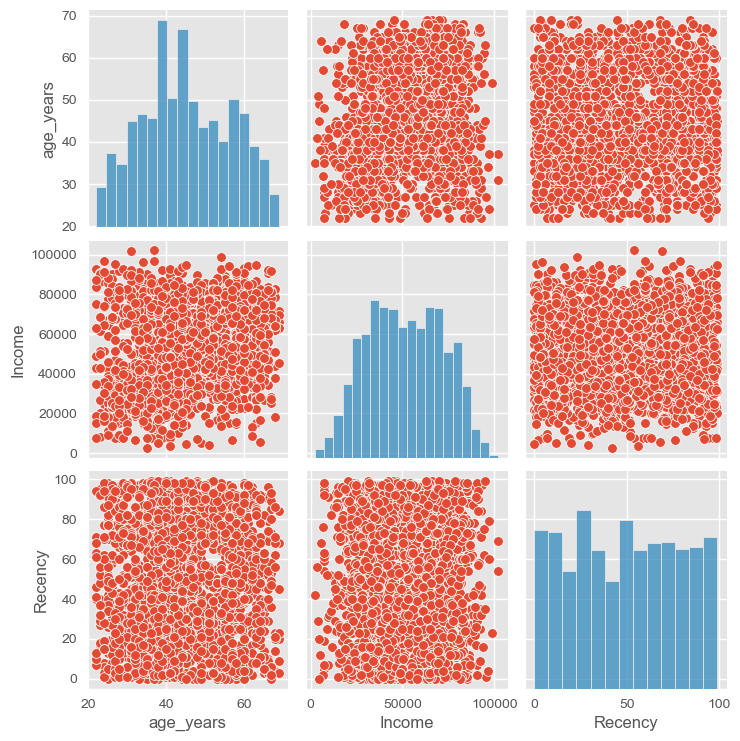

In [14]:
vars_corr = ["age_years","Income","Recency"]
sns.pairplot(filtered_df[vars_corr])
plt.show()

### Correlation of numerical features

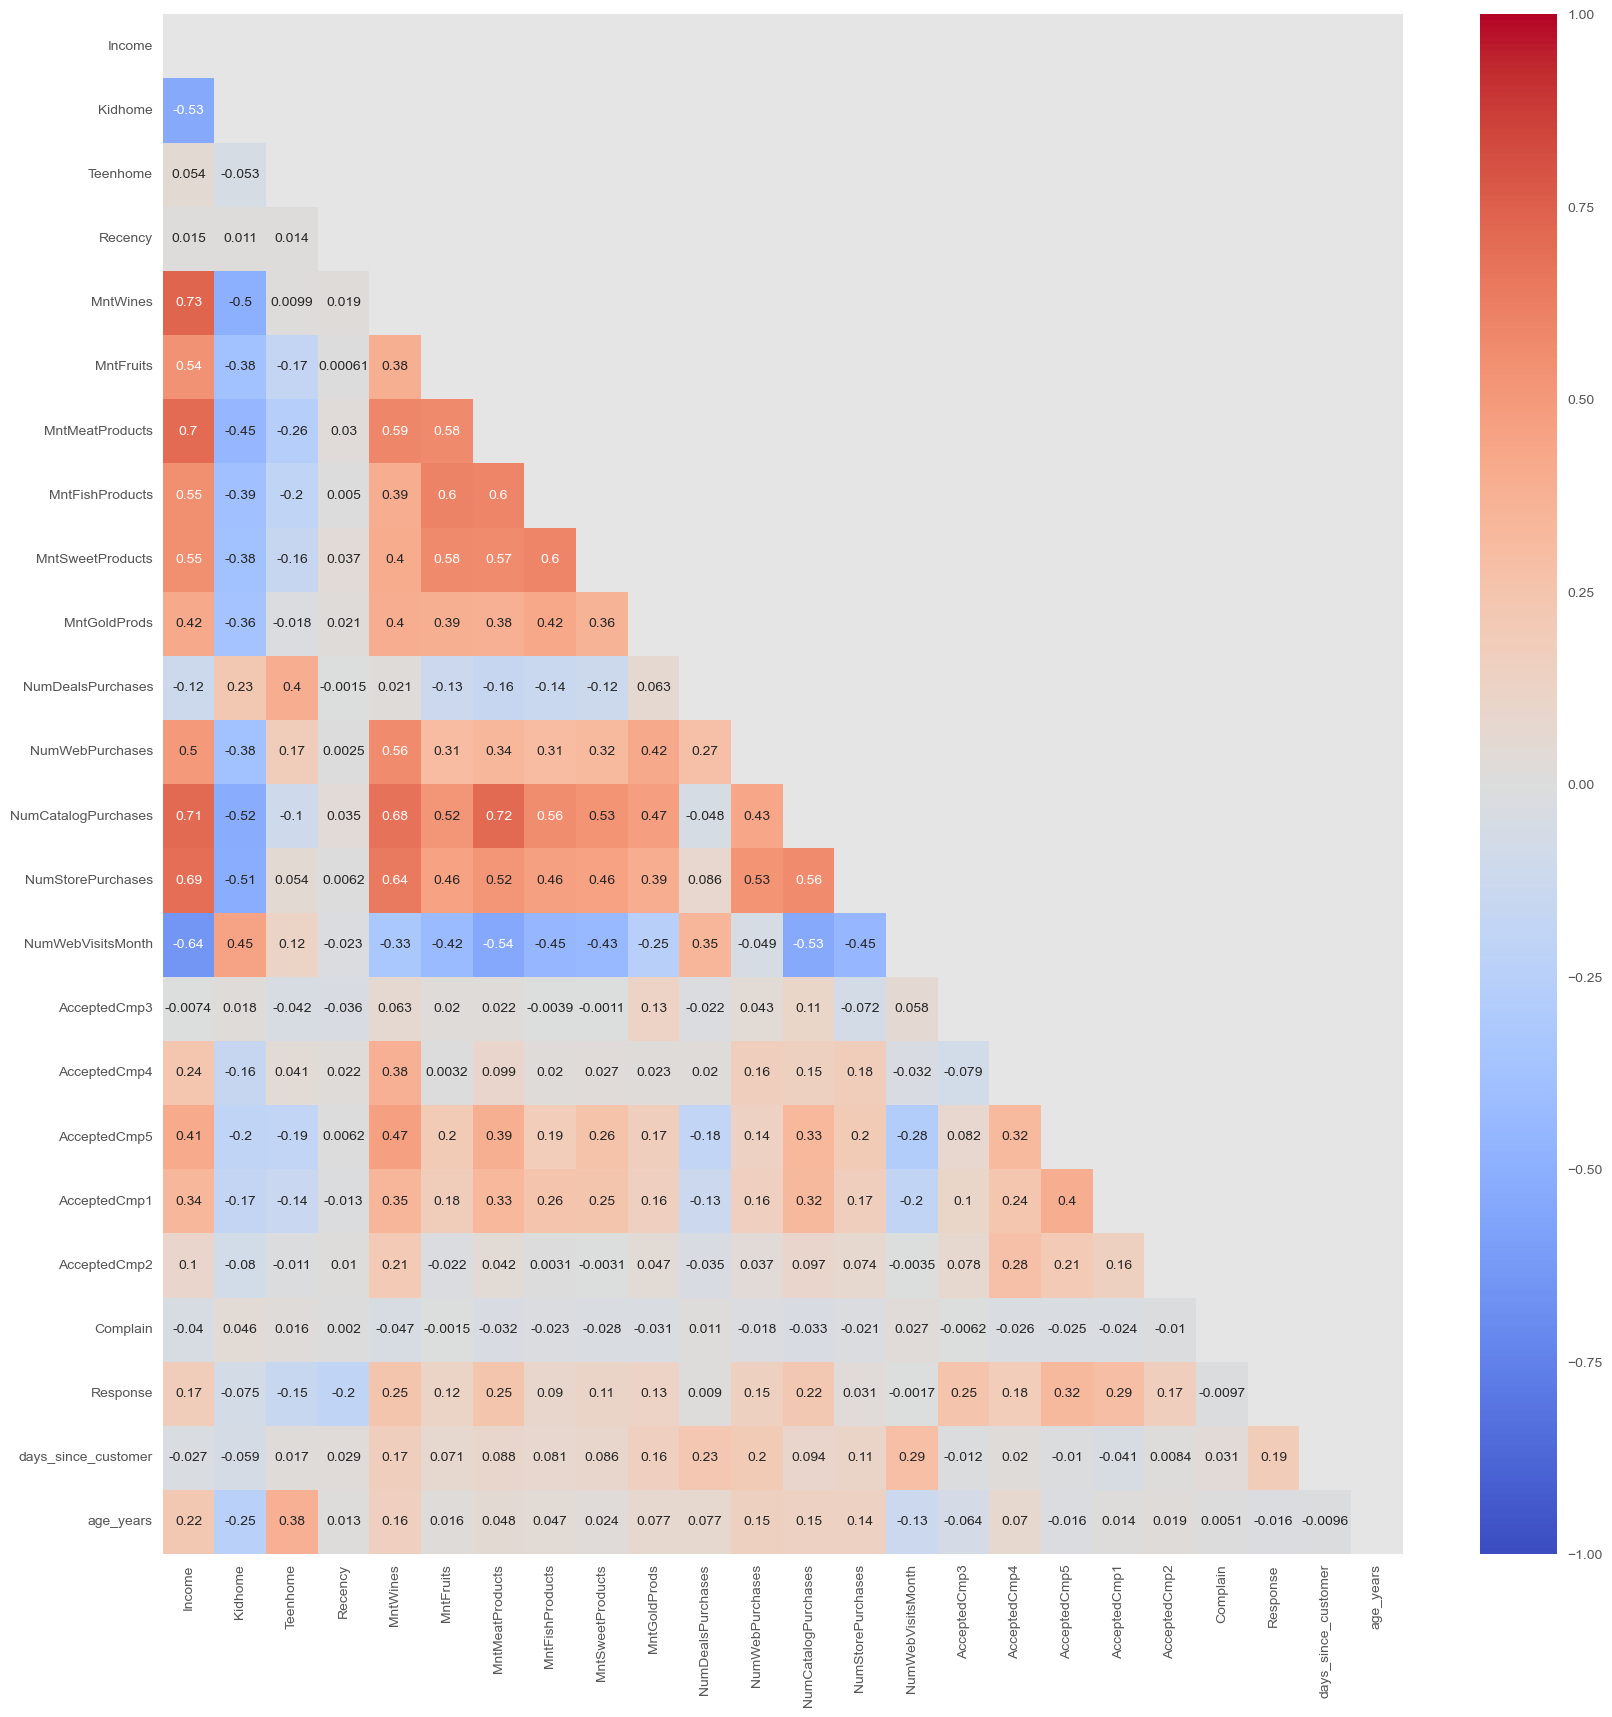

In [15]:
df_corr = filtered_df.loc[:, ~filtered_df.columns.isin(['Z_CostContact',"Z_Revenue"])].corr()
# print(df_corr)
fig= plt.figure(figsize=(20,20))
mask = np.triu(df_corr)
sns.heatmap(df_corr,annot=True,mask=mask,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

### Encoding categorical variables

In [16]:
filtered_df = pd.get_dummies(filtered_df, columns=["Marital_Status","Education"],prefix="_")

### Standard Scaling Features

In [17]:
scaler = StandardScaler()
scaled_mat = scaler.fit_transform(filtered_df)
scaled_df = pd.DataFrame(columns=filtered_df.columns,data=scaled_mat)

#### Conclusion:

- 45 outliers removed based on income/birth-year.
- 24 data-points removed for NaN values
- Skewness and kurtosis negligible for Income and Birth-year


**Positive Correlations:**
  
    - Income-MntWines : 0.73
    - NumCatalogPurchases-MntMeatProducts: 0.72
    - NumCatalogPurchases-Income: 0.71
    - Income - MntMeatProducts: 0.7


 **Negative Correlations:**

    - NumWebVisits - Income: -0.64
    - NumWebVisits - MntMeatProducts: -0.54
    - KidHome - Income: -0.53
    - NumWebVisits - NumCatalogPurchases: -0.53


---

## 4. Principal Component Analysis

In [18]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.transform(scaled_df),columns=["feature1","feature2","feature3"])

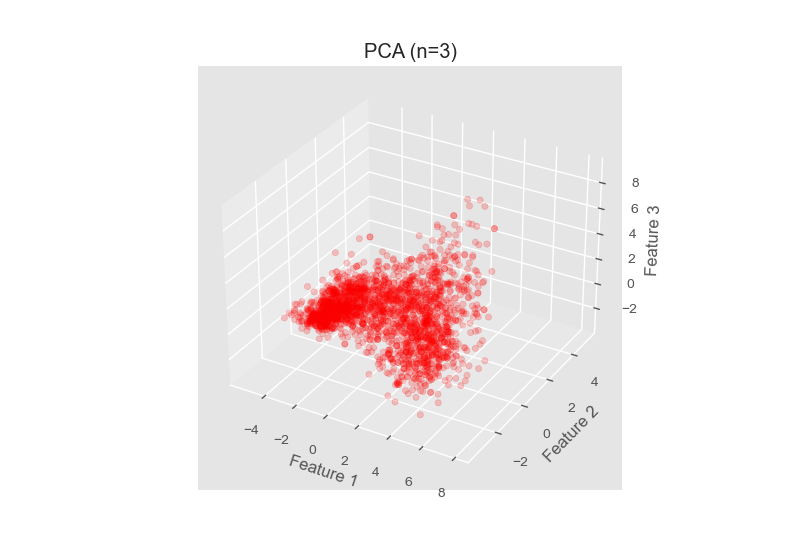

In [19]:
%matplotlib widget

xs=pca_df["feature1"]
ys=pca_df["feature2"]
zs=pca_df["feature3"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(xs, ys, zs, color='red',alpha=0.2)
ax.set_title("PCA (n=3)")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

---

## 5. Clustering

In [20]:
K = range(1,10)
distortions = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pca_df)
    distortions.append(kmeanModel.inertia_)

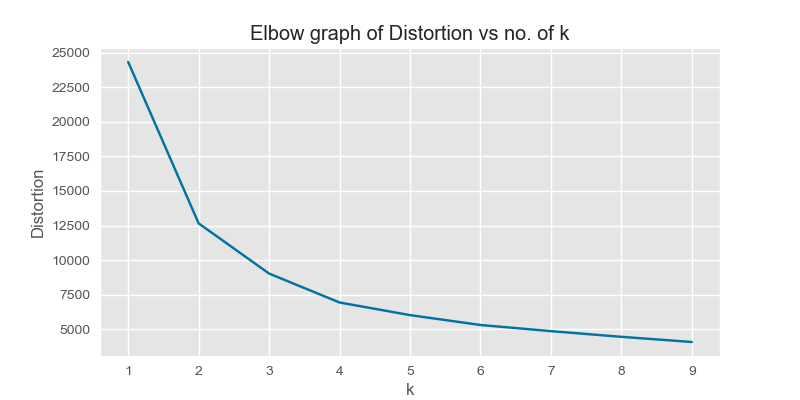

In [21]:
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow graph of Distortion vs no. of k')
plt.show()

In [22]:
AC = AgglomerativeClustering(n_clusters=3)
yhat_AC = AC.fit_predict(pca_df)
pca_df["Clusters"] = yhat_AC
filtered_df["Clusters"]= yhat_AC

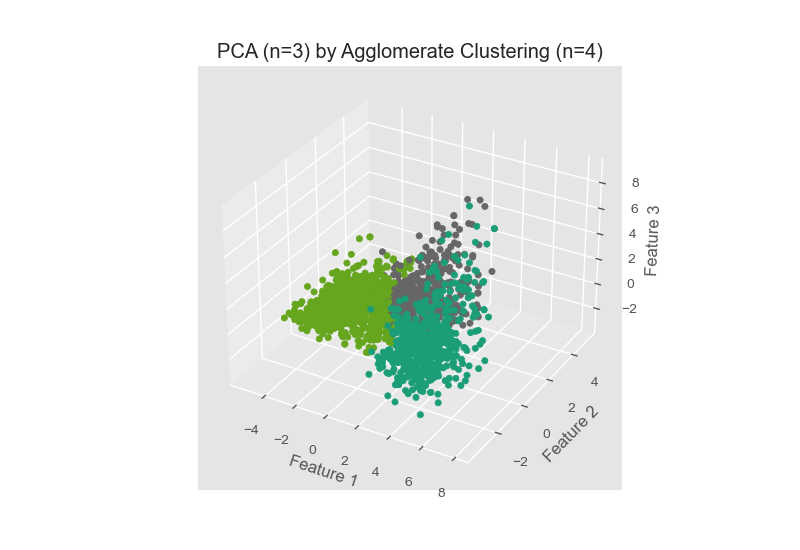

In [23]:
%matplotlib widget
xs=pca_df["feature1"]
ys=pca_df["feature2"]
zs=pca_df["feature3"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
COLORS = ["#003f5c","#58508d","#bc5090","#ff6361","#ffa600"]
ax.scatter3D(xs, ys, zs, c=filtered_df["Clusters"],alpha=1,cmap="Dark2")

ax.set_title("PCA (n=3) by Agglomerate Clustering (n=4)")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
  

plt.show()

---

## 6. Analysis

#### 6.1 income vs spending

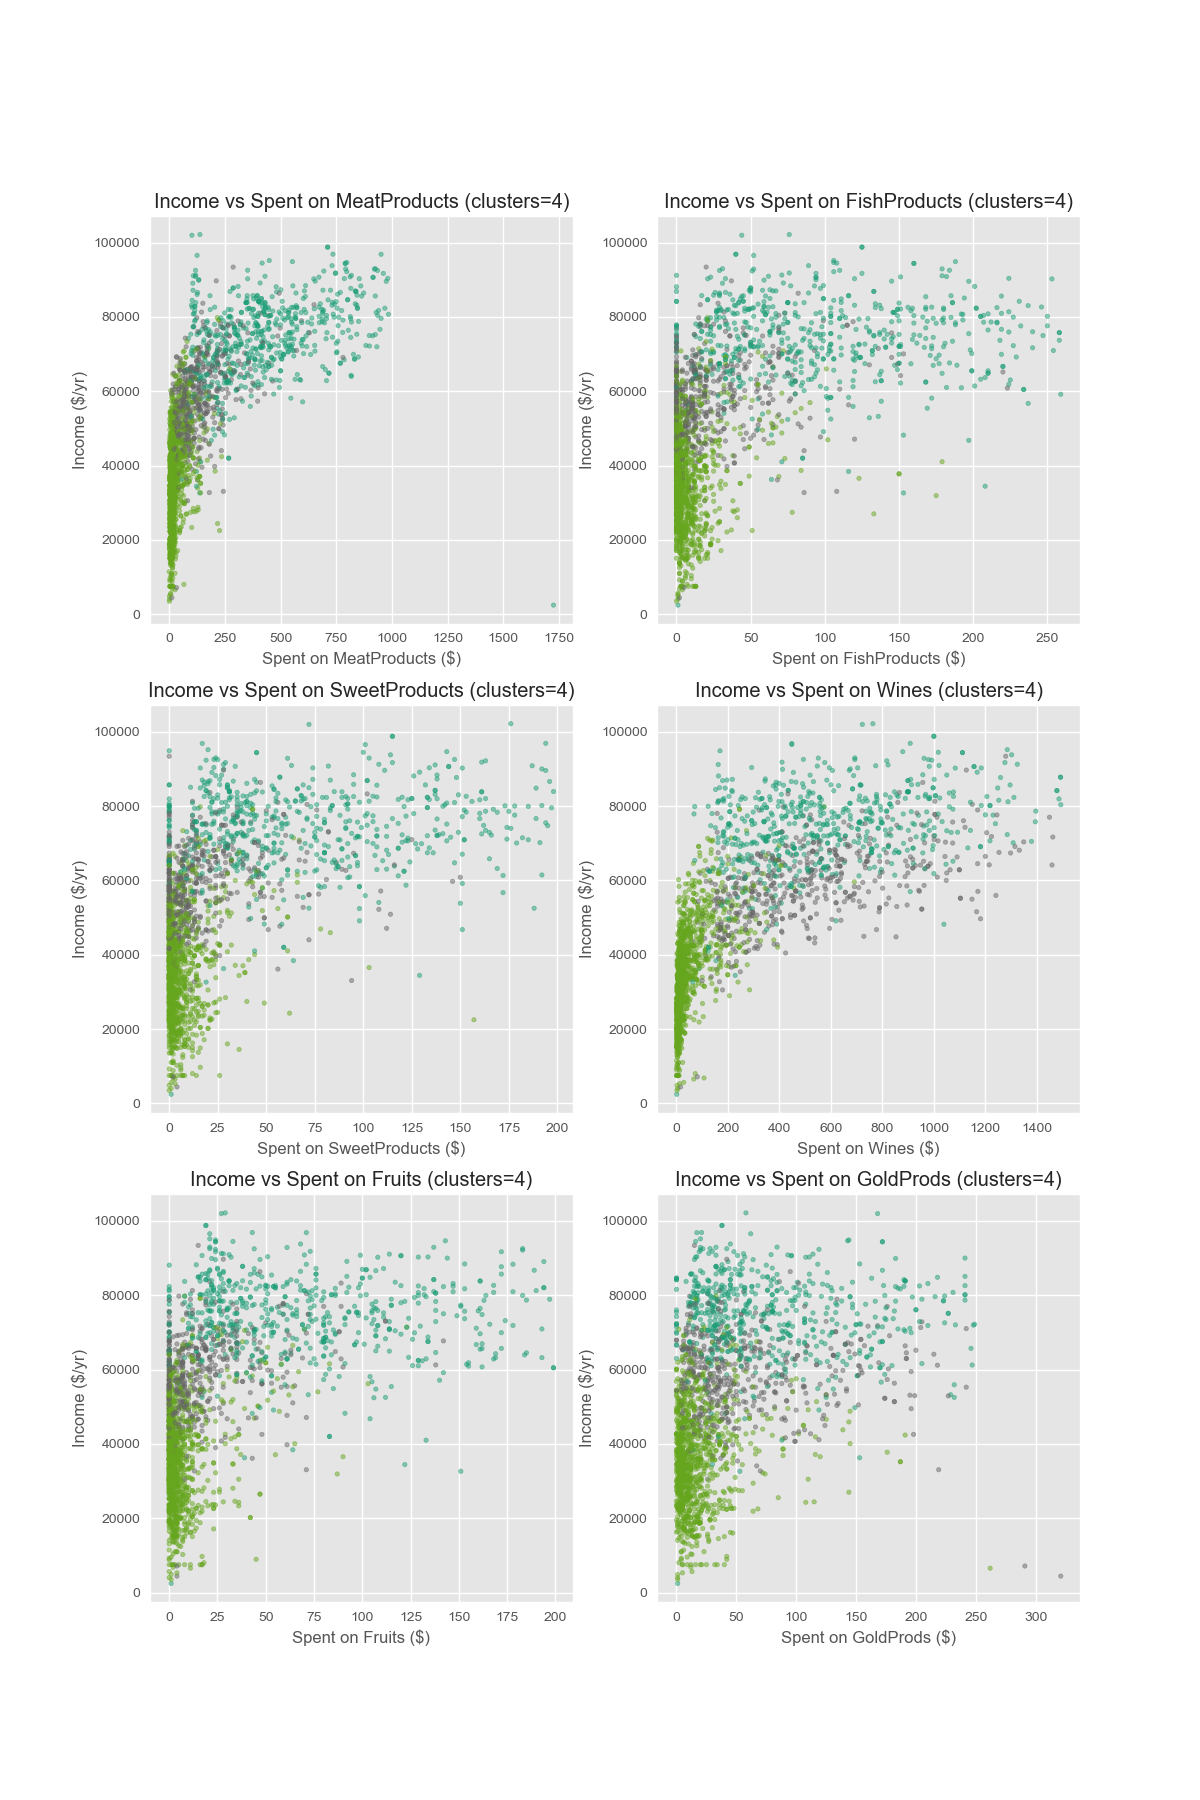

In [24]:
nrows = 3
ncols=2

fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(12,18))
spending_category = ["MntMeatProducts","MntWines","MntFruits","MntFishProducts","MntSweetProducts","MntGoldProds"]
for i,cat in enumerate(spending_category):
    axs[i%nrows,i%ncols].scatter(filtered_df[spending_category[i]],filtered_df["Income"],c=filtered_df["Clusters"],cmap="Dark2",s=10,alpha=0.5)
    axs[i%nrows,i%ncols].set_ylabel("Income ($/yr)")
    axs[i%nrows,i%ncols].set_xlabel("Spent on {} ($)".format(cat[3:]))
    axs[i%nrows,i%ncols].set_title("Income vs Spent on {} (clusters=4)".format(cat[3:]))
    


### 6.2 Promotions used

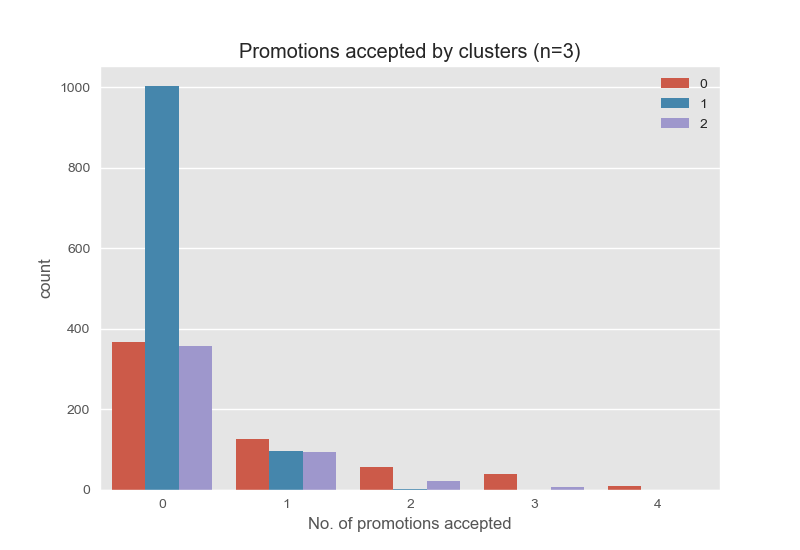

In [25]:
filtered_df["no_promotions"] = filtered_df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]].sum(axis=1)
fig,ax = plt.subplots()
ax =sns.countplot(x=filtered_df["no_promotions"],hue=filtered_df["Clusters"])
ax.set_title("Promotions accepted by clusters (n=3)")
ax.set_xlabel("No. of promotions accepted")
ax.legend(loc=1)
plt.show()

### 6.3 Base characteristics

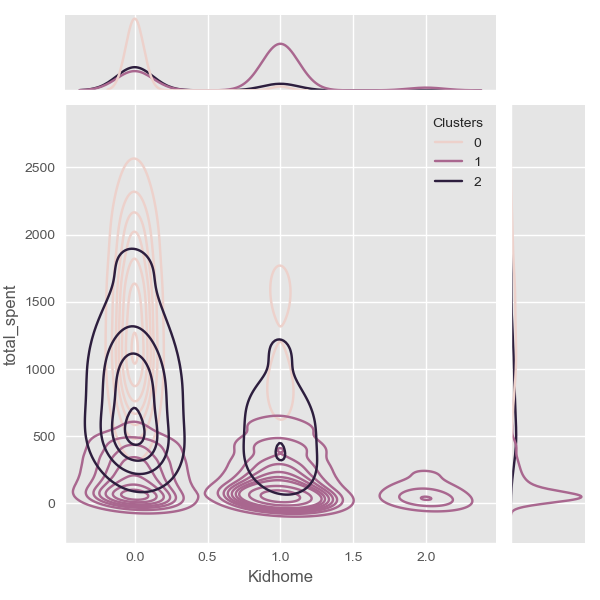

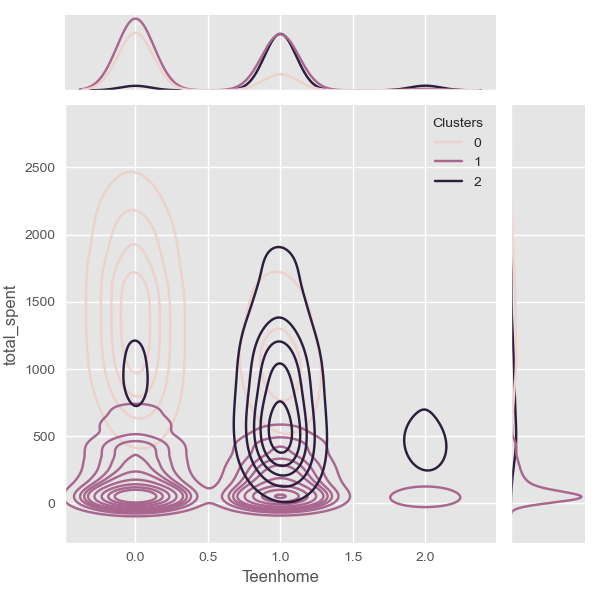

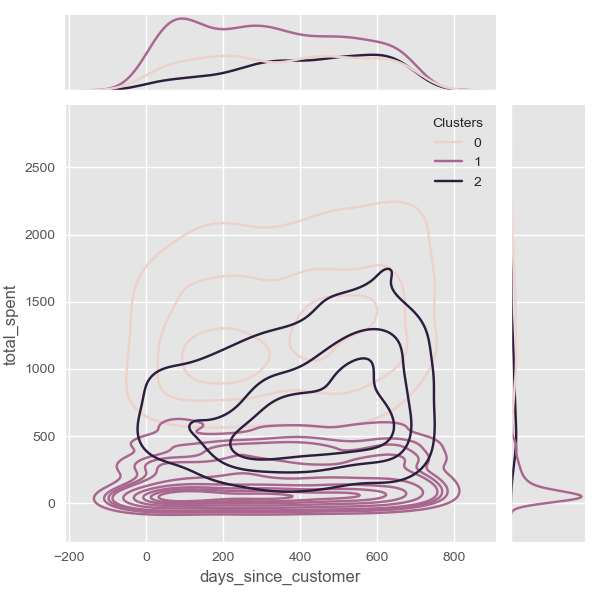

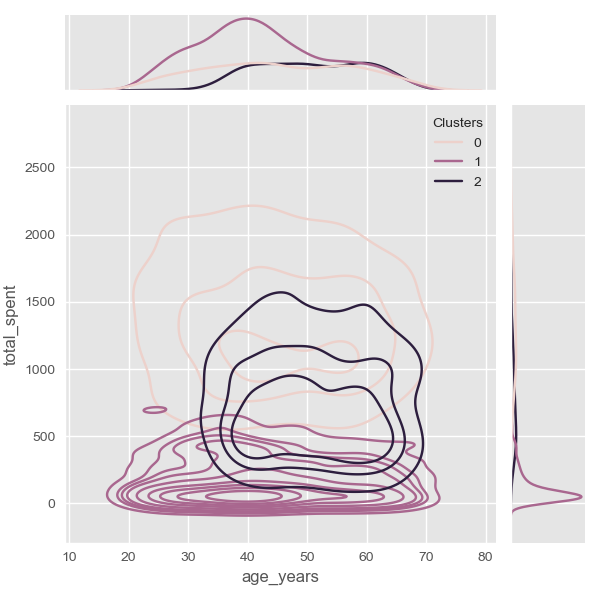

In [26]:
filtered_df["total_spent"] = filtered_df[spending_category].sum(axis=1)
base_category = [ "Kidhome","Teenhome","days_since_customer", "age_years"]
for i,cat in enumerate(base_category):
    sns.jointplot(x=filtered_df[cat], y=filtered_df["total_spent"], hue =filtered_df["Clusters"], kind="kde")
    plt.show()

## 7. Conclusion


After cleaning the data and preparing it for classification, we came up with 3 clusters based on the PCA results. 
Broken down to these 3 clusters, we found that by spending, around half are low income earners who spend on 25% of the total spent, middle income earners spend around 35% and high income earners are evenly distributed along the spending dimension.

Regarding the promotion campaign, we cans see that cluster 1 accepted promotions mainly in period 1, while cluster 0 and 2 are exponentially decreasing over the periods, in the 4th period only cluster 2 remaining.



## 8. Sources

It goes without saying that as any of my notebook collections, this is also just a notebook that helps me reference different data analysis methods in python. 
Most methods used in this notebook are inspired by other Kaggle competitors notebooks.
To mention a few:

- <a href=https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering>Customer Segmentation Clustering (Karnika Kapoor)</a>